# 6장 확률변수

In [18]:
import scipy.stats as sp
import matplotlib.pyplot as plt

In [15]:
D1 = [1, 2, 3, 4, 5, 6]
D2 = [1, 2, 3, 4, 5, 6]
X = list()
for i in D1:
  for j in D2:
    X.append(abs(i-j))
X = set(X)


def f(x):
  cnt = 0
  for i in D1:
    for j in D2:
      if (x == abs(i-j)):
        cnt += 1
  return cnt/36

prob = [f(x) for x in X]
print(f"확률변수 X의 확률질량함수: {dict(zip(X, prob))}")

def F(x):
    return sum([f(u) for u in X if u<=x])

s_prob = [ F(x) for x in X ]
print(f'확률분포함수: {dict(zip(X, s_prob))}')
    

확률변수 X의 확률질량함수: {0: 0.16666666666666666, 1: 0.2777777777777778, 2: 0.2222222222222222, 3: 0.16666666666666666, 4: 0.1111111111111111, 5: 0.05555555555555555}
확률분포함수: {0: 0.16666666666666666, 1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8333333333333333, 4: 0.9444444444444444, 5: 1.0}


In [12]:
# 예제 7-1
p = 1/3
rv = sp.bernoulli(p)

# 확률질량함수 pmf
print(f"f(P=0) = {rv.pmf(0)}")
print(f"f(P=1) = {rv.pmf(1)}")

# 누적분포함수 cdf
print(f"F(P<2) = {rv.cdf(1)}")

f(P=0) = 0.6666666666666667
f(P=1) = 0.3333333333333333
F(P<2) = 1.0


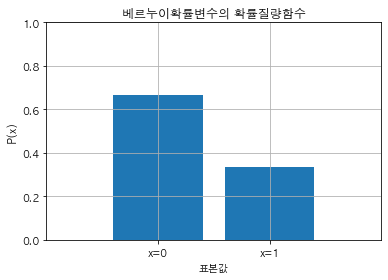

In [9]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

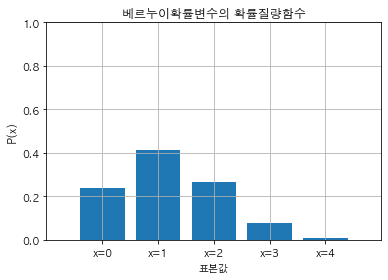

X의 평균: 1.2
X의 분산: 0.84


In [18]:
# 7-2
p, n = 0.3, 4
rv = sp.binom(n, p)
xx = [0,1,2,3,4]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 5)
plt.ylim(0, 1)
plt.xticks(xx, ['x=0','x=1', 'x=2', 'x=3', 'x=4'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

print(f"X의 평균: {p*n}")
print(f"X의 분산: {p*(1-p)*n}")

In [24]:
# 예제 7-2
p = 1/4
n = 5
rv = sp.binom(n, p)

#1. P(X <= 1)
print(f"P(X<=1) = {rv.cdf(1)}")

P(X<=1) = 0.6328125


In [22]:
# 1. P(X<=1)
print(f"P(X<=1) = {round(rv.cdf(1), 4)}")
# 2. P(X=2)
print(f"P(X=2) = {round(rv.pmf(2), 4)}")
# 3. P(X<3)
print(f"P(X<3) = {round(rv.cdf(2), 4)}")
# 4. P(X>3)
print(f"P(X>3) = {1-round(rv.cdf(2), 4)}")

P(X<=1) = 0.6517
P(X=2) = 0.2646
P(X<3) = 0.9163
P(X>3) = 0.0837


In [39]:
# 표준정규분포
rv = sp.norm(0, 1)

print(f"a : {1 - rv.cdf(1.45)}")
print(f"b : {rv.cdf(2.58) - 0.5}")
print(f"c : {1 - rv.cdf(2.04)}")
print(f"d : {rv.cdf(1.37) - 0.5}")
print(f"e : {2 * (rv.cdf(1.69) - 0.5)}")
print(f"f : {2*(1-rv.cdf(2.79))}")



a : 0.0735292596096484
b : 0.4950599842422293
c : 0.020675162866070074
d : 0.41465654917803296
e : 0.9089720453569003
f : 0.005270804155809827


In [47]:
m, std = 75, 5
rv = sp.norm(m, std)

print(f"a : {rv.cdf(64)}")
print(f"b : {rv.cdf(82) - rv.cdf(68)}")
print(f"c : {1 - rv.cdf(87.5)}")



a : 0.013903447513498595
b : 0.8384866815324579
c : 0.006209665325776159
a : 0.8961653188787
b : 0.8961653188787


In [48]:
m, std = 140, 5
rv = sp.norm(m, std)
print(f"a : {rv.cdf(146.3)}")
print(f"b : {1 - rv.cdf(133.7)}")


a : 0.8961653188787
b : 0.8961653188787


In [51]:
# 이항분포의 정규근사 
import numpy as np

# X ~ B(n, p)
# mu = n*p , std **2 = n * p * (1-p)

n, p, q = 100, 1/5, 4/5
a, b = 14, 25

m = n*p
std = np.sqrt(n*p*q)
rv = sp.norm(m, std)
print(rv.cdf(b) - rv.cdf(a))

0.8275430250642866


In [76]:
# 7-12
n, p, q = 100, 0.4, 0.6
m = n*p
std = np.sqrt(n*p*q)

rv1 = sp.norm(loc = m, scale = std)
rv2 = sp.norm(0, 1)
print(rv1.cdf(47.5))
print(rv2.cdf(1.53))
print(rv1.cdf(45) - rv1.cdf(35))


0.93710678768053
0.9369916355360216
0.6925658340726046


In [60]:
# 7-11
n, p, q = 720, 0.12, 0.88
a,b = 105, 145
m = n*p
std = np.sqrt(n*p*q)

rv = sp.norm(loc = m, scale = std)
b = rv.cdf(b) - rv.cdf(a)
b


0.016457552675704035

In [73]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
n, p, q = 720, 0.12, 0.88
a,b = 105, 145
import scipy.integrate as integrate
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 *np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2*sigma**2))
    return x_range, f

def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')

X=N(n*p, np.sqrt(n*p*q))
get_prob(X,a,b)

확률: 0.0165


In [74]:
n, p, q = 100, 0.4, 0.6
a, b = 35, 45
X=N(n*p, np.sqrt(n*p*q))
get_prob(X,a,b)

확률: 0.6926


0.3333333333333333
0.22222222222222224
0.2222222222222222


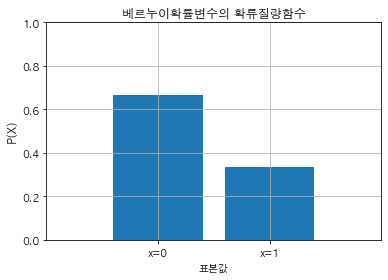

In [28]:
p = 1/3

rv = sp.bernoulli(p)

print(rv.mean())
print(rv.var())

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0', 'x=1'])
plt.xlabel("표본값")
plt.ylabel("P(X)")
plt.title("베르누이확률변수의 확류질량함수")
plt.grid()
plt.show()


In [39]:
p = 0.25
n = 5
rv = sp.binom(n, p)
print(rv.mean())
print(rv.var())
print(rv.cdf(1))
print(rv.pmf(2))
print(rv.cdf(2))
print(1-rv.cdf(3))

1.25
0.9375
0.6328125
0.26367187499999994
0.896484375
0.015625


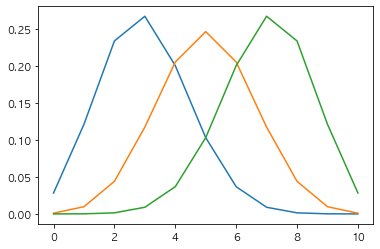

In [45]:
import numpy as np
p1, p2, p3 = 0.3, 0.5, 0.7
n = 10
rv1 = sp.binom(n, p1)
rv2 = sp.binom(n, p2)
rv3 = sp.binom(n, p3)

xx = np.arange(n + 1)
plt.plot(xx, rv1.pmf(xx))
plt.plot(xx, rv2.pmf(xx))
plt.plot(xx, rv3.pmf(xx))


In [46]:
n = 5
p = 1/4
rv = sp.binom(n, p)
print(rv.cdf(1))
print(rv.pmf(2))
print(rv.cdf(2))
print(1 - rv.cdf(3))

0.6328125
0.26367187499999994
0.896484375
0.015625


In [58]:
p = 0.25

rv = sp.geom(p)
rv.cdf(3)


0.578125

In [62]:
lam = 2
rv = sp.poisson(lam)
rv.pmf(0)

lam = 10
rv = sp.poisson(lam)
rv.pmf(15)

lam = 10
rv = sp.poisson(lam)
rv.pmf(5)

0.03783327480207079

In [ ]:
n = 10
p = 1/6
rv = sp.multinomial(n, p)


In [64]:
mu = 170
std = 5
rv = sp.norm(mu, std)

rv.cdf(175) - rv.cdf(165)

mu = 70
std = 8
rv = sp.norm(mu, std)
rv.cdf(86) - rv.cdf(54)

0.9544997361036416

/Users/aebdeung-ichangmin-ing/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aebdeung-ichangmin-ing/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


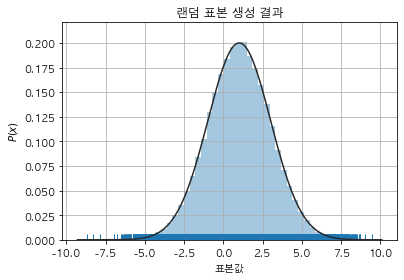

In [77]:
import seaborn as sns
np.random.seed(0)
x = rv.rvs(100000)


sns.distplot(x, rug=True, kde=False, fit=sp.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.grid()
plt.show()


In [81]:
n, std = 1, 2

rv = sp.norm(n, std)


In [90]:
rv = sp.norm(0, 1)

print(rv.cdf(-1.45))
print(rv.cdf(2.58) - 0.5)
print(1 - rv.cdf(2.04))
print(0.5 - rv.cdf(-1.37))
print((rv.cdf(1.69)-0.5) * 2)
print((1-rv.cdf(2.79))*2)

0.07352925960964836
0.4950599842422293
0.020675162866070074
0.414656549178033
0.9089720453569003
0.005270804155809827


In [92]:
rv = sp.norm(75, 5)

print(rv.cdf(64))
print(rv.cdf(82)-rv.cdf(68))
print(1-rv.cdf(87.5))

0.013903447513498595
0.8384866815324579
0.006209665325776159


In [94]:
rv = sp.norm(140, 5)

print(rv.cdf(146.3))
print(1-rv.cdf(133.7))

0.8961653188787
0.8961653188787


In [100]:
rv = sp.binom(100, 1/5)
mu = rv.mean()
std = rv.std()

rv = sp.norm(mu, std)
rv.cdf(25) - rv.cdf(14)

#이항분포 정규근사 확률

0.8320808942183757


0.8275430250642866

In [121]:
rv = sp.binom(100, 0.4)
m = rv.mean()
s = rv.std()

rv = sp.norm(m, round(s, 2))
rv.cdf(47.5)
1-rv.cdf(33.5)
rv.pdf(43)

0.06742898445272338